<a href="https://colab.research.google.com/github/Davz33/tutorials/blob/tensorflow/pandas_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A pandas operation learning notebook.

In [1]:
!pip install pandas
!apt-get install libpoppler-dev
!apt-get install poppler-utils
!pip install pdf2image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libpoppler-dev is already the newest version (0.86.1-0ubuntu1.1).
libpoppler-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 174 kB of archives.
After this operation, 754 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu fo

--2023-02-13 15:47:25--  https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
Resolving pandas.pydata.org (pandas.pydata.org)... 104.26.1.204, 104.26.0.204, 172.67.71.236, ...
Connecting to pandas.pydata.org (pandas.pydata.org)|104.26.1.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 396529 (387K) [application/pdf]
Saving to: ‘Pandas_Cheat_Sheet.pdf’

Pandas_Cheat_Sheet. 100%[===================>] 387.24K  --.-KB/s    in 0.05s   

2023-02-13 15:47:26 (8.28 MB/s) - ‘Pandas_Cheat_Sheet.pdf’ saved [396529/396529]



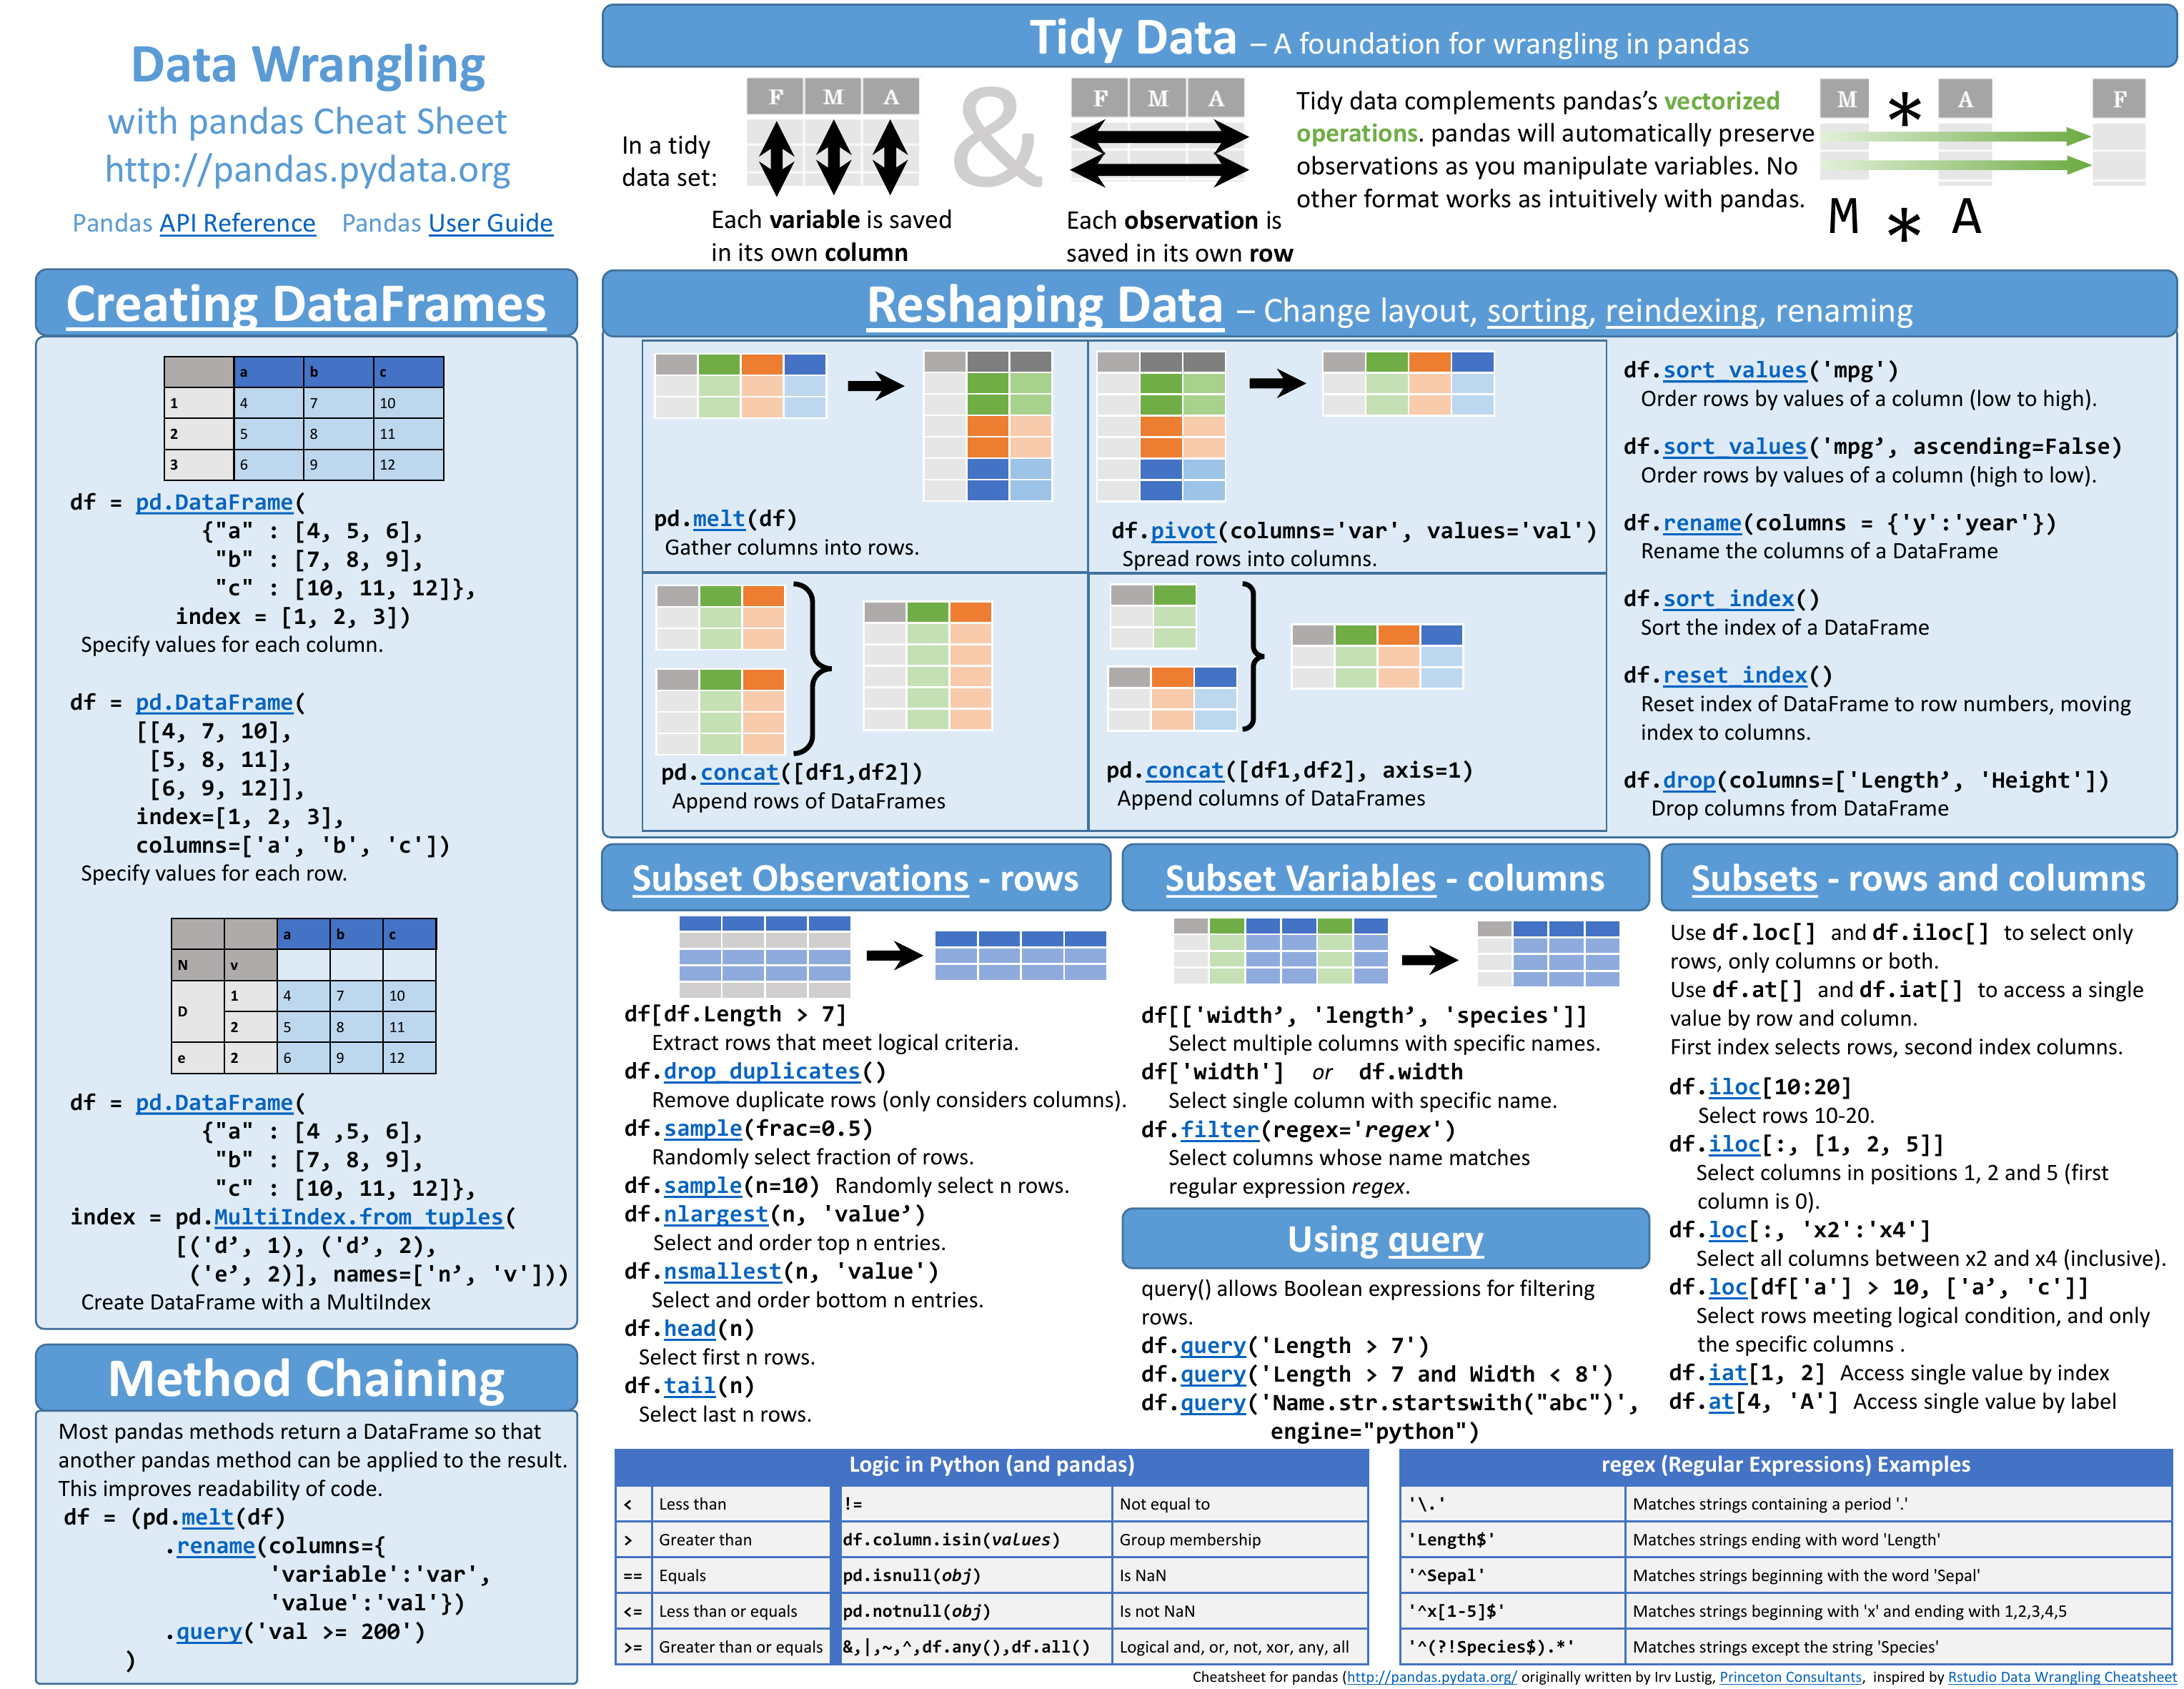

In [2]:
import pandas as pd
!wget https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
!mkdir imgs
from pdf2image import convert_from_path
images = convert_from_path(pdf_path='./Pandas_Cheat_Sheet.pdf')
images[0]


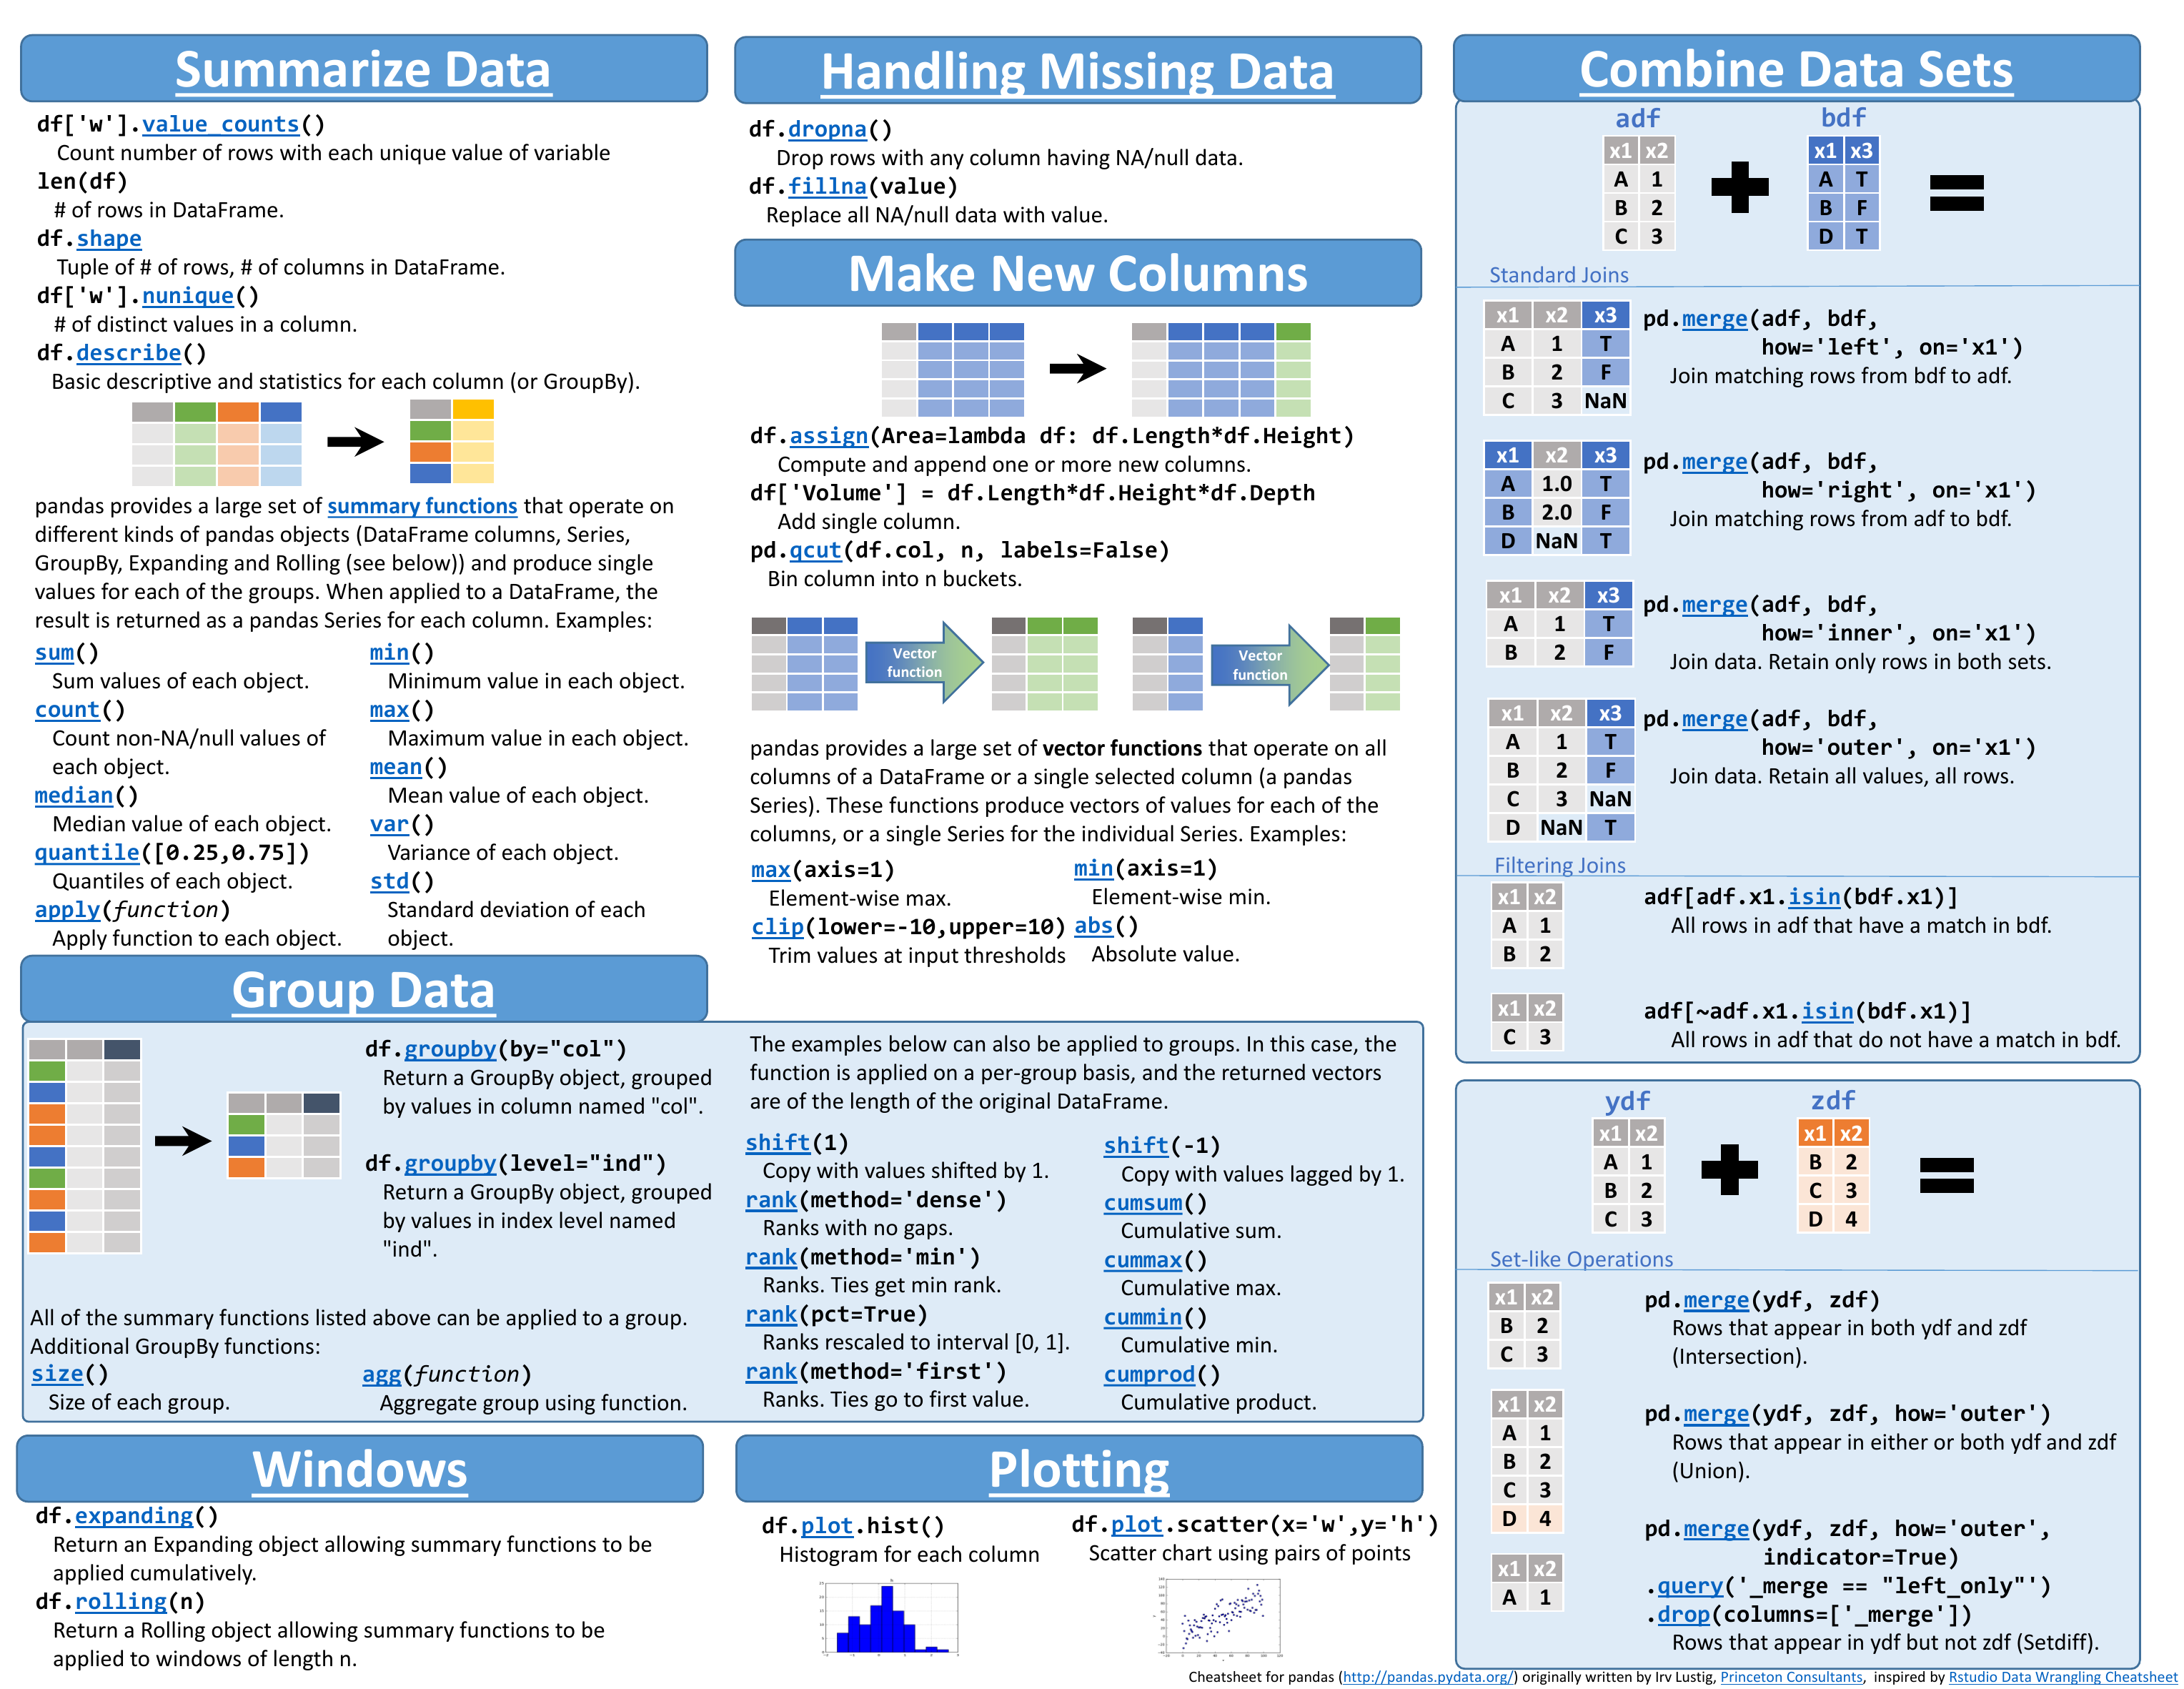

In [3]:
images[1]

In [4]:
!mkdir data && cd data && wget https://www.stats.govt.nz/assets/Uploads/Annual-enterprise-survey/Annual-enterprise-survey-2021-financial-year-provisional/Download-data/annual-enterprise-survey-2021-financial-year-provisional-csv.csv

--2023-02-13 15:47:29--  https://www.stats.govt.nz/assets/Uploads/Annual-enterprise-survey/Annual-enterprise-survey-2021-financial-year-provisional/Download-data/annual-enterprise-survey-2021-financial-year-provisional-csv.csv
Resolving www.stats.govt.nz (www.stats.govt.nz)... 45.60.15.104
Connecting to www.stats.govt.nz (www.stats.govt.nz)|45.60.15.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6617174 (6.3M) [text/csv]
Saving to: ‘annual-enterprise-survey-2021-financial-year-provisional-csv.csv’

-year-provisional-c  27%[====>               ]   1.74M  10.2KB/s    eta 7m 8s  ^C


In [5]:
data = pd.read_csv('data/annual-enterprise-survey-2021-financial-year-provisional-csv.csv')
print(data.columns)
print(data.dtypes)
data.head(10)

Index(['Year', 'Industry_aggregation_NZSIOC', 'Industry_code_NZSIOC',
       'Industry_name_NZSIOC', 'Units', 'Variable_code', 'Variable_name',
       'Variable_category', 'Value', 'Industry_code_ANZSIC06'],
      dtype='object')
Year                            int64
Industry_aggregation_NZSIOC    object
Industry_code_NZSIOC           object
Industry_name_NZSIOC           object
Units                          object
Variable_code                  object
Variable_name                  object
Variable_category              object
Value                          object
Industry_code_ANZSIC06         object
dtype: object


,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
0,2021,Level 1,99999,All industries,Dollars (millions),H01,Total income,Financial performance,"757,504",ANZSIC06 divisions A-S (excluding classes K633...
1,2021,Level 1,99999,All industries,Dollars (millions),H04,"Sales, government funding, grants and subsidies",Financial performance,"674,890",ANZSIC06 divisions A-S (excluding classes K633...
2,2021,Level 1,99999,All industries,Dollars (millions),H05,"Interest, dividends and donations",Financial performance,"49,593",ANZSIC06 divisions A-S (excluding classes K633...
3,2021,Level 1,99999,All industries,Dollars (millions),H07,Non-operating income,Financial performance,"33,020",ANZSIC06 divisions A-S (excluding classes K633...
4,2021,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,"654,404",ANZSIC06 divisions A-S (excluding classes K633...
5,2021,Level 1,99999,All industries,Dollars (millions),H09,Interest and donations,Financial performance,"26,138",ANZSIC06 divisions A-S (excluding classes K633...
6,2021,Level 1,99999,All industries,Dollars (millions),H10,Indirect taxes,Financial performance,"6,991",ANZSIC06 divisions A-S (excluding classes K633...
7,2021,Level 1,99999,All industries,Dollars (millions),H11,Depreciation,Financial performance,"27,801",ANZSIC06 divisions A-S (excluding classes K633...
8,2021,Level 1,99999,All industries,Dollars (millions),H12,Salaries and wages paid,Financial performance,"123,620",ANZSIC06 divisions A-S (excluding classes K633...
9,2021,Level 1,99999,All industries,Dollars (millions),H13,Redundancy and severance,Financial performance,275,ANZSIC06 divisions A-S (excluding classes K633...


For the sake of plotting, we need some of the variables to be casted to numeric types:

In [6]:
from pandas._libs.tslibs import dtypes
data = pd.read_csv(
    'data/annual-enterprise-survey-2021-financial-year-provisional-csv.csv',
    dtype={'Value':str},
    parse_dates=['Year'])
data.Value=data.Value.apply(lambda x : pd.to_numeric(x.replace(",",""),errors='coerce'))
print(data.dtypes)

Year                           datetime64[ns]
Industry_aggregation_NZSIOC            object
Industry_code_NZSIOC                   object
Industry_name_NZSIOC                   object
Units                                  object
Variable_code                          object
Variable_name                          object
Variable_category                      object
Value                                 float64
Industry_code_ANZSIC06                 object
dtype: object


In [7]:
data.describe(include='all')

<ipython-input-7-589a52936347>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
count,11565,11565,11565,11565,11565,11565,11565,11565,1.115100e+04,11564
unique,3,3,139,117,3,39,40,3,NaN,119
top,2021-01-01 00:00:00,Level 4,CC611,Primary Metal and Metal Product Manufacturing,Dollars (millions),H01,Total income,Financial performance,NaN,"ANZSIC06 groups C201, C202, C203, and C209"
freq,4635,6251,108,216,9075,346,346,5779,NaN,216
first,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.325563e+04,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.363744e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.523000e+05,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.400000e+01,NaN


Data-shuffle (everyday I'm pdshuff-ling)

In [8]:
data_ = data.sample(frac=1).reset_index(drop=True)
data_.head(10)

,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
0,2020-01-01,Level 4,CC912,Other Manufacturing,Dollars (millions),H17,Purchases of goods bought for resale,Financial performance,68.0,ANZSIC06 group C259
1,2021-01-01,Level 4,CC821,Electronic and Electrical Equipment Manufacturing,Dollars (millions),H07,Non-operating income,Financial performance,63.0,"ANZSIC06 groups C241, C242, C243, and C244"
2,2020-01-01,Level 4,MN114,Veterinary and Other Professional Services,Dollars (millions),H11,Depreciation,Financial performance,54.0,ANZSIC06 groups M697 and M699
3,2019-01-01,Level 4,CC911,Furniture Manufacturing,Dollars,H35,Surplus per employee count,Financial ratios,20100.0,ANZSIC06 group C251
4,2019-01-01,Level 3,DD11,Electricity and Gas Supply,Dollars (millions),H21,Opening stocks,Financial performance,266.0,"ANZSIC06 groups D261, D262, D263, D264, and D270"
5,2021-01-01,Level 1,KK,Financial and Insurance Services,Dollars (millions),H22,Closing stocks,Financial performance,156.0,ANZSIC06 division K
6,2020-01-01,Level 4,KK121,Life Insurance,Dollars (millions),H11,Depreciation,Financial performance,24.0,ANZSIC06 group K631
7,2020-01-01,Level 1,OO,"Public Order, Safety and Regulatory Services",Dollars (millions),H04,Sales of goods and services,Financial performance,1671.0,"ANZSIC06 division O (excluding classes O751, O..."
8,2019-01-01,Level 1,BB,Mining,Dollars (millions),H33,Other liabilities,Financial position,5402.0,ANZSIC06 division B
9,2019-01-01,Level 4,AA141,"Poultry, Deer and Other Livestock Farming",Percentage,H41,Liabilities structure,Financial ratios,42.0,"ANZSIC06 groups A017, A018, and A019"


In [9]:
import matplotlib.pyplot as plt

In [10]:
subs=data[['Year','Industry_name_NZSIOC','Value']]
subs.head()

,Year,Industry_name_NZSIOC,Value
0,2021-01-01,All industries,757504.0
1,2021-01-01,All industries,674890.0
2,2021-01-01,All industries,49593.0
3,2021-01-01,All industries,33020.0
4,2021-01-01,All industries,654404.0


We are interested in specific industries earnings, so let's filter out "All industries"

In [11]:
subs=subs.query('Industry_name_NZSIOC != "All industries"')
subs_=subs.groupby(['Industry_name_NZSIOC','Year']).agg({'Value':'sum'})
subs_.head(100)

Value
Industry_name_NZSIOC                Year                 
Accommodation                       2020-01-01   220412.0
                                    2021-01-01   226046.0
Accommodation and Food Services     2020-01-01   259567.0
                                    2021-01-01   257919.0
Administrative and Support Services 2020-01-01   218063.0
...                                                   ...
Forestry and Logging                2020-01-01  3423172.0
                                    2021-01-01  3478908.0
Furniture Manufacturing             2019-01-01   248487.0
                                    2020-01-01   261881.0
                                    2021-01-01   281880.0

[100 rows x 1 columns]

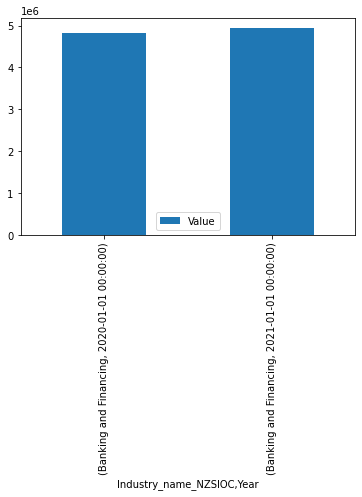

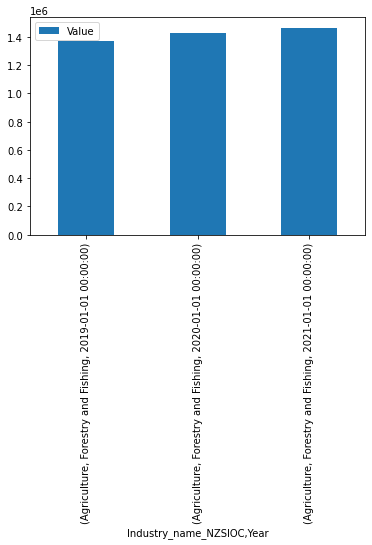

In [21]:
baf = subs_.query('Industry_name_NZSIOC == "Banking and Financing"')
baf.plot.bar()

baf = subs_.query('Industry_name_NZSIOC == "Agriculture, Forestry and Fishing"')
baf.plot.bar()


In [ ]:
data.plot.bar(x='')